In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from numpy import array
plt.rcParams['figure.figsize'] = [20, 8]

In [20]:
df = pd.read_csv('../Dataset/Palladium.csv')
df = df.sort_index(ascending=False)
df

,Date,Open,Close,High,Low
1686,3/1/2019,1545.5,1551.5,1564.0,1529.0
1685,3/3/2019,1551.5,1549.5,1551.5,1549.5
1684,3/4/2019,1552.5,1535.5,1561.5,1515.5
1683,3/5/2019,1533.0,1514.5,1537.0,1505.5
1682,3/6/2019,1518.5,1535.0,1542.5,1507.0
...,...,...,...,...,...
4,3/22/2024,1008.5,992.5,1018.0,983.5
3,3/23/2024,992.5,992.5,992.5,992.5
2,3/24/2024,0.0,984.0,0.0,983.0
1,3/25/2024,986.0,1007.5,1027.0,985.5


In [21]:
df['Close'].isnull().sum()

0

In [22]:
df = df.reset_index()['Close']

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [24]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [25]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 9s 150ms/step - loss: 0.0617 - val_loss: 0.0413
Epoch 2/100
20/20 [==============================] - 2s 80ms/step - loss: 0.0060 - val_loss: 0.0151
Epoch 3/100
20/20 [==============================] - 2s 85ms/step - loss: 0.0032 - val_loss: 0.0158
Epoch 4/100
20/20 [==============================] - 2s 79ms/step - loss: 0.0025 - val_loss: 0.0115
Epoch 5/100
20/20 [==============================] - 2s 83ms/step - loss: 0.0020 - val_loss: 0.0082
Epoch 6/100
20/20 [==============================] - 2s 80ms/step - loss: 0.0017 - val_loss: 0.0057
Epoch 7/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 8/100
20/20 [==============================] - 2s 79ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 9/100
20/20 [==============================] - 2s 87ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 2s 80ms/step - loss: 9.6917e-04 - val_loss: 7

In [30]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 22ms/step


In [31]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [32]:
train_size1 = int(0.8 * len(df))
test_size1 = len(df) - train_size

train_data1 = df[:train_size]
test_data1 = df[train_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

In [33]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Testing RMSE:', test_rmse)

#MSE
test_mse = np.mean((y_pred - y_test1)**2)
print('Testing MSE:', test_mse)

#MAPE
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Testing MAE:', test_mae)

Testing RMSE: 241.98416599424024
Testing MSE: 58556.33659192802
Testing MAPE: 15.619018906552352
Testing MAE: 192.42080871873088


In [34]:
lst_output=[]
n_steps=100
i=0

x_input = test_data[len(test_data) - n_steps:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.05953496]
101
1 day input [0.14492129 0.14492129 0.14492129 0.14362735 0.16109554 0.15505715
 0.15548846 0.15354755 0.15354755 0.15354755 0.15354755 0.1388829
 0.12508087 0.11861117 0.10437783 0.10437783 0.10545611 0.09445762
 0.09036015 0.07612681 0.07569549 0.07569549 0.07569549 0.05908993
 0.04981669 0.05758033 0.05240457 0.05003235 0.05003235 0.05046366
 0.04873841 0.03299547 0.02501617 0.03558335 0.03752426 0.03752426
 0.03752426 0.03407375 0.03687729 0.0483071  0.03515204 0.04313133
 0.04313133 0.04313133 0.05154195 0.05089498 0.05844296 0.04744447
 0.03773992 0.03773992 0.03773992 0.04075911 0.0388182  0.01682122
 0.01358637 0.00043131 0.00043131 0.00388182 0.01552728 0.
 0.03213284 0.03989648 0.03989648 0.03989648 0.03989648 0.04097477
 0.0547768  0.03946517 0.04766013 0.04960104 0.04960104 0.04334699
 0.03709295 0.02911365 0.03601466 0.04226871 0.04270002 0.04701316
 0.03558335 0.07957731 0.07677378 0.06944145 0.07224499 0.07634246
 0.07806772 0.08885055 0.08971318 0.096829

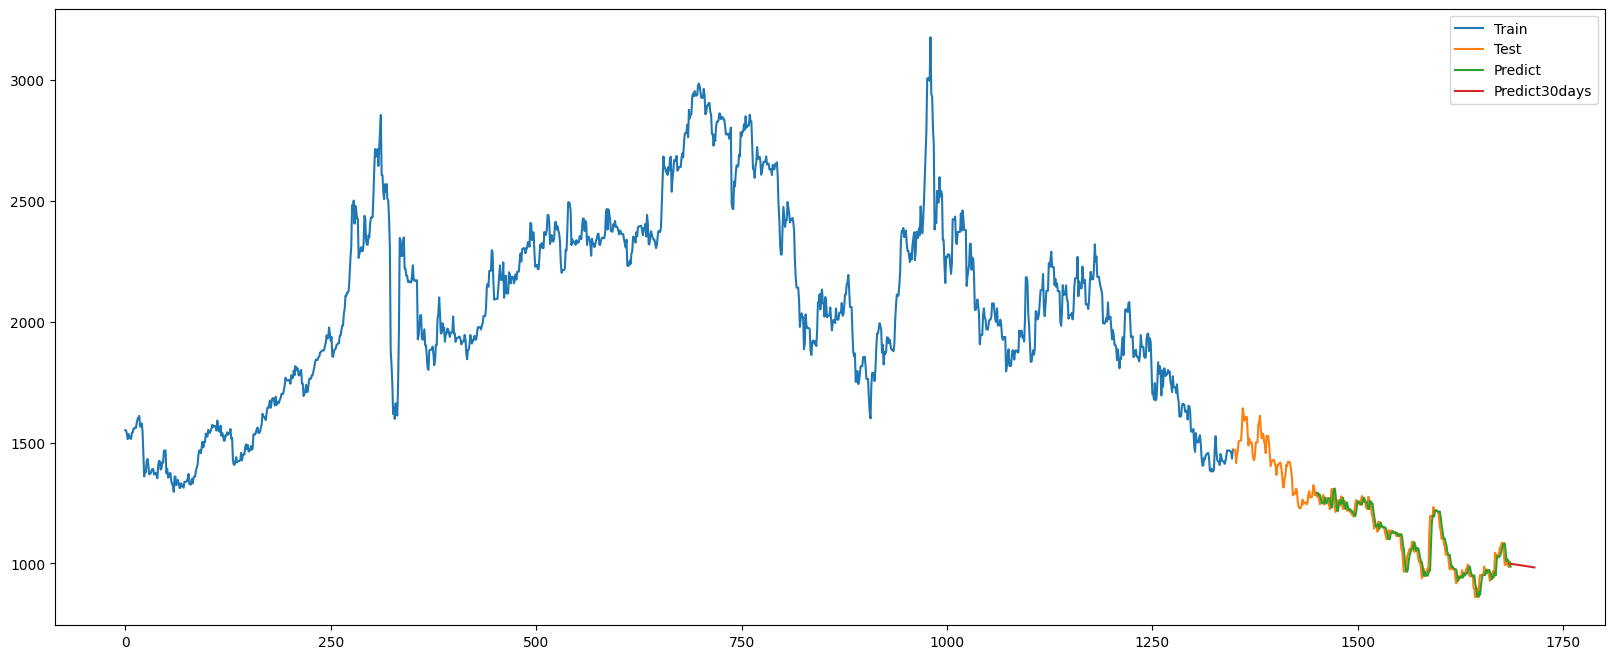

<Figure size 2000x800 with 0 Axes>

In [35]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.figure()
plt.show()